In [1]:
import pandas as pd

D:\ANACONDA\ANA\envs\aiworks\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\ANACONDA\ANA\envs\aiworks\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
D:\ANACONDA\ANA\envs\aiworks\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
from nsepy import get_history as gh
import datetime as dt

In [3]:
dataset = pd.read_csv('Tatacoffee13_21.csv')

# Convert the 'Date' column to datetime
dataset['Date'] = pd.to_datetime(dataset['Date'])

# Set the desired start and end dates
start = dt.datetime(2021, 6, 1)
end = dt.datetime(2022, 2, 11)

# Filter the DataFrame based on the date range
mask = (dataset['Date'] >= start) & (dataset['Date'] <= end)
stk_data = dataset.loc[mask]


In [4]:
stk_data 

,Date,Open,High,Low,Close
2080,2021-06-01,180.00,181.35,172.65,174.25
2081,2021-06-02,173.55,175.65,172.05,174.00
2082,2021-06-03,176.90,178.70,175.60,176.70
2083,2021-06-04,177.90,177.90,173.75,174.35
2084,2021-06-07,176.40,176.65,173.00,174.35
...,...,...,...,...,...
2220,2021-12-22,202.90,207.80,201.35,205.00
2221,2021-12-23,206.00,206.85,202.05,202.95
2222,2021-12-24,203.90,203.90,199.35,201.00
2223,2021-12-27,200.00,222.00,196.00,218.35


In [5]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[["Close"]])
print("Len:",data1.shape)

Len: (145, 1)


In [7]:
import numpy as np
from sklearn.metrics import mean_squared_error

def rmsemape(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mape

orders = [(1, 1, 1), (1, 1, 2), (2, 3, 1), (2, 2, 2)]
orderslist = []
rscorelist = []

for i in orders:
    orderslist.append(i)
    from statsmodels.tsa.arima.model import ARIMA
    model = ARIMA(data1, order=i)
    model_fit = model.fit()
    y_pred = model_fit.predict(0, len(data1) - 1)

    # Calculate RMSE and MAPE
    rmse, mape = rmsemape(data1, y_pred)
    rscorelist.append((rmse, mape))

# Print the results
for i, (order, (rmse, mape)) in enumerate(zip(orderslist, rscorelist)):
    print(f"Order={order}, RMSE={rmse:.2f}, MAPE={mape:.2f}%")

    

D:\ANACONDA\ANA\envs\aiworks\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
D:\ANACONDA\ANA\envs\aiworks\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
D:\ANACONDA\ANA\envs\aiworks\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
D:\ANACONDA\ANA\envs\aiworks\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
D:\ANACONDA\ANA\envs\aiworks\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
D:\ANACONDA\ANA\envs\aiworks\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
D:\ANACONDA\ANA\envs\aiworks\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid v

Order=(1, 1, 1), RMSE=0.08, MAPE=nan%
Order=(1, 1, 2), RMSE=0.08, MAPE=nan%
Order=(2, 3, 1), RMSE=0.10, MAPE=nan%
Order=(2, 2, 2), RMSE=0.09, MAPE=nan%


D:\ANACONDA\ANA\envs\aiworks\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
D:\ANACONDA\ANA\envs\aiworks\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
D:\ANACONDA\ANA\envs\aiworks\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


D:\ANACONDA\ANA\envs\aiworks\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


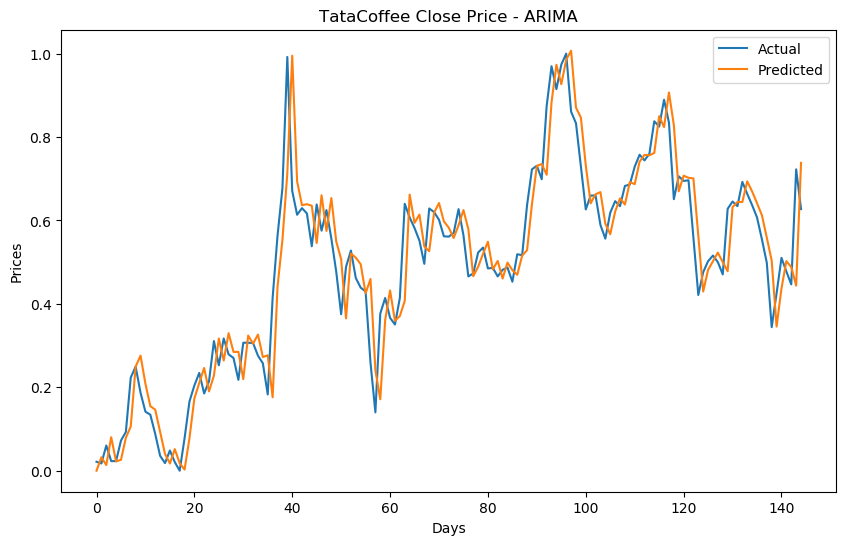

In [8]:
import matplotlib.pyplot as plt
model_fit = model.fit()
y_pred = model_fit.predict(0, len(data1) - 1)
plt.figure(figsize=(10, 6))
plt.plot(data1, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.title('TataCoffee Close Price - ARIMA')
plt.legend()
plt.show()


In [9]:
len(data1)

145

In [11]:
import numpy as np
import pandas as pd
model_fit = model.fit()
y_pred = model_fit.predict(0, len(data1) - 1)
actual_stock_price_test_ori = Ms.inverse_transform(data1.reshape(-1, 1))
actual_stock_price_test_oriA = pd.DataFrame({'Close': actual_stock_price_test_ori.flatten()})
predicted_stock_price_test_ori = Ms.inverse_transform(y_pred.reshape(-1, 1))
predicted_stock_price_test_oriP = pd.DataFrame({'Close': predicted_stock_price_test_ori.flatten()})

D:\ANACONDA\ANA\envs\aiworks\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


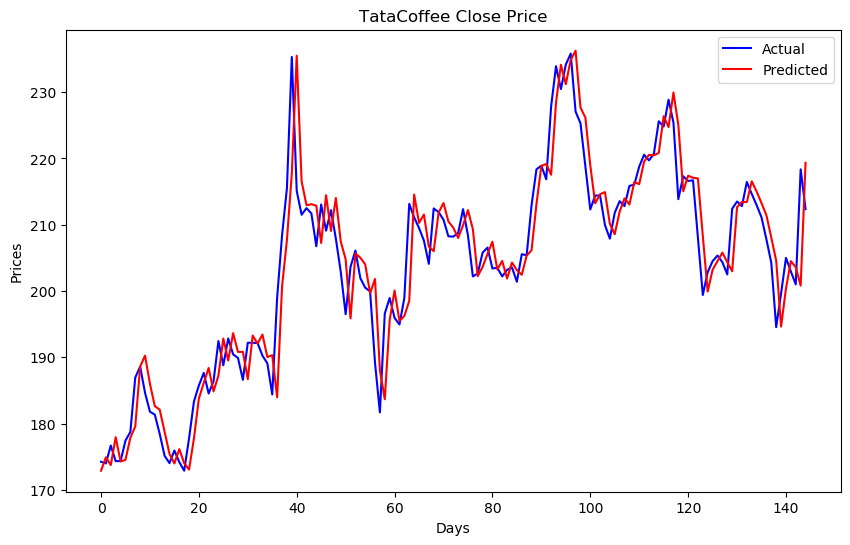

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(actual_stock_price_test_oriA['Close'], label='Actual', color='blue')
plt.plot(predicted_stock_price_test_oriP['Close'], label='Predicted', color='red')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.title('TataCoffee Close Price')
plt.legend()
plt.show()


In [14]:
def rmsemape(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mape
actual_close_values = actual_stock_price_test_oriA['Close'].values
predicted_close_values = predicted_stock_price_test_oriP['Close'].values
rmse, mape = rmsemape(actual_close_values, predicted_close_values)

print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


RMSE: 5.36
MAPE: 1.89%


In [15]:
forecast=model_fit.predict(len(data1), len(data1)+3)

In [16]:
forecast

array([0.6074572 , 0.63951182, 0.61740592, 0.64611226])

In [19]:
fTestNormTable = pd.DataFrame({'Closefore': forecast})
forecast_stock_price_test_ori = Ms.inverse_transform(fTestNormTable[['Closefore']])
forecast_stock_price_test_oriF = pd.DataFrame({'Closefore': forecast_stock_price_test_ori[:, 0]})

In [20]:
forecast_stock_price_test_oriF.to_csv("Closets.csv",index=False)

In [21]:
forecast_stock_price_test_oriF

,Closefore
0,211.109058
1,213.125293
2,211.734832
3,213.540461


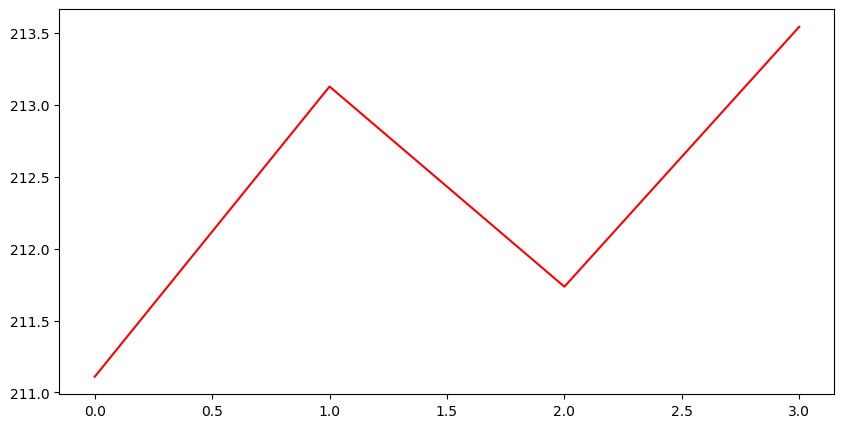

In [22]:
plt.figure(figsize=(10,5))
plt.plot(actual_stock_price_test_oriA[2000:2225], color = 'blue', label="Actual")
plt.plot(forecast_stock_price_test_oriF, color = 'red', label ="Predicted")